# 1. Find missing values (*)

  a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame

  b) Do some initial explorations with the methods to get an understanding of the dataset:

> head(), info(), describe(), value_counts(), unique(), columns()

  c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py. When you come across more useful functions, you can store them in your data_utils module.

  d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

  e) Find all rows where the freetime is NaN.

  f) Find all rows where the freetime or the age is NaN.

  g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

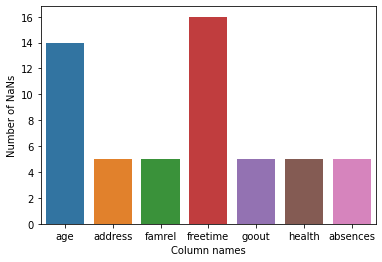

In [2]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import data_utils as du

#a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame


df_student_rawdata = pd.read_csv('../data/student-mat-missing-data.csv')

#  b) Do some initial explorations with the methods to get an understanding of the dataset:


# columnes:
# ['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
#       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
#       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
#       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
#       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

#df_student_rawdata["famsup"].unique()
#df_student_rawdata.describe()
# drop "Unnamed: 0", just indeces

# c) Create a function that takes in a DataFrame as input parameter and plots a barplot
#  with the columns that have missing values. Put this function into a file called
#  data_utils.py. When you come across more useful functions, you can store them in your
#  data_utils module.

df_student, Nnans = du.extract_nan_columns(df_student_rawdata)




In [31]:
#   e) Find all rows where the freetime is NaN.
#
#df_student.info()
# All rows with nans
#df_student[df_student.isna().any(axis="columns")]

# All rows where freetime is Nan
df_student[df_student["freetime"].isna() == True]



,age,address,famrel,freetime,goout,health,absences
87,15.0,U,5.0,NaN,3.0,1.0,4.0
99,16.0,U,5.0,NaN,5.0,3.0,0.0
130,15.0,R,4.0,NaN,2.0,5.0,0.0
149,15.0,U,4.0,NaN,5.0,5.0,0.0
151,16.0,U,4.0,NaN,4.0,5.0,6.0
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,19.0,U,4.0,NaN,1.0,1.0,12.0
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

#  f) Find all rows where the freetime or the age is NaN.

df_student[df_student["freetime"].isna() | df_student["age"].isna()]


,age,address,famrel,freetime,goout,health,absences
20,NaN,U,4.0,4.0,1.0,1.0,0.0
71,NaN,U,3.0,3.0,3.0,3.0,0.0
87,15.0,U,5.0,NaN,3.0,1.0,4.0
99,16.0,U,5.0,NaN,5.0,3.0,0.0
102,NaN,U,5.0,3.0,3.0,5.0,4.0
106,NaN,U,5.0,1.0,2.0,3.0,8.0
121,NaN,U,5.0,5.0,4.0,5.0,6.0
130,15.0,R,4.0,NaN,2.0,5.0,0.0
149,15.0,U,4.0,NaN,5.0,5.0,0.0
151,16.0,U,4.0,NaN,4.0,5.0,6.0


In [21]:

#  g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

# summer antal nans per row

#numbernans = df_student[df_student["freetime"].isna() | df_student["age"].isna()].isna().sum()

totalnans = Nnans.sum()[1]

print(Nnans)
print("")


#df_student.info()
# gives 395 rows, 7 columns, same as sze of dataset
Ndata = df_student.size


nanproportions = totalnans/Ndata
print(f"Proportions of NaNs in total student data set: {nanproportions * 100:.2f}%")
print(f"Proportions of NaNs per columns in student data set (%):\n{Nnans['Number of NaNs']/395 * 100}")




  Column names  Number of NaNs
0          age              14
1      address               5
2       famrel               5
3     freetime              16
4        goout               5
5       health               5
6     absences               5

Proportions of NaNs in total student data set: 1.99%
Proportions of NaNs per columns in student data set (%):
0    3.544304
1    1.265823
2    1.265823
3    4.050633
4    1.265823
5    1.265823
6    1.265823
Name: Number of NaNs, dtype: float64


In [61]:
# In these two columns though
#print(f"Proportion of NaN in thes two columns: (age and freetime) {Nnans}")

print(f"Proportions of NaN in thes two columns: (age and freetime): {(Nnans['Number of NaNs'].loc[0] + Nnans['Number of NaNs'].loc[3])/Ndata*100:.2f}%")

# plot

#Nnans[[Nnans["Column names"] == "age",Nnans["Column names"] == "age"]]
#select_color = df.loc[df['Color'] == 'Green']

Nnans[Nnans["Column names"] == "age" & Nnans["Column names"] == "freetime"]

#sns.barplot(data=Nnans, x="Column names", y="Number of NaNs")

# TODO LÖS FANSKAPET

Proportions of NaN in thes two columns: (age and freetime): 1.08%


TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]